# HIML TakeHome6

In [1]:
import scipy.io as sio
import numpy as np
from os import getcwd
from os.path import join 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import seaborn as sns

In [2]:
fname = join(getcwd(),'data','data3SS2009.mat')

mat_contents = sio.loadmat(fname)

dataset = mat_contents['dataset']

N, Chno, Nc = dataset.shape
# N: number of samples
# Chno: number of channels
# Nc: number of cases

Y = mat_contents['labels'].reshape(Nc)

# print sizes 
#pd.DataFrame(np.array([N, Chno, Nc,len(Y)]))

In [3]:
mask = (Y <= 9)
mask2 = (Y > 9)
Yc = Y

Yc[mask] = 0
Yc[mask2] = 1

#Ylabels = ["" for i in range(len(Y))]
#Ylabels[mask] = "Undamaged"
#Ylabels[mask2] = "Damaged"
#Ylabels


# AutoRegression + PCA + scaling



In [4]:
# AutoRegression
X_ = np.empty((0, 850), float)
for i in range(4):
    chdata = dataset[:,i+1,:]
    ch_corr = []
    for j in range(np.shape(chdata)[1]):
        res = AutoReg(chdata[:,j],lags=29,old_names=False).fit()
        ch_corr.append(res.params)
    
    X_ = np.append(X_, np.array(ch_corr).transpose() , axis=0)
X = np.transpose(X_)

# np.shape(X)

# pca
pca = PCA(random_state=0, whiten=True, n_components=.95)
X_pca = pca.fit_transform(X)
Xpca_scaled = MinMaxScaler(feature_range=(-1,1)).fit_transform(X_pca)

# nPC = np.shape(Xpca_scaled)[1]
# nPC

# k-means classification

In [10]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(Xpca_scaled)
yh_km = kmeans.labels_


# Visualize data

C:\Users\rodri\AppData\Local\Temp/ipykernel_16268/2780927389.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48)
C:\Users\rodri\AppData\Local\Temp/ipykernel_16268/2780927389.py:13: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48)
C:\Users\rodri\AppData\Local\Temp/ipykernel_16268/2

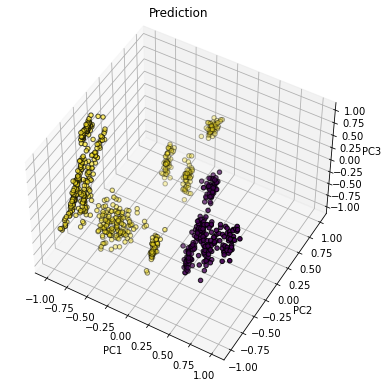

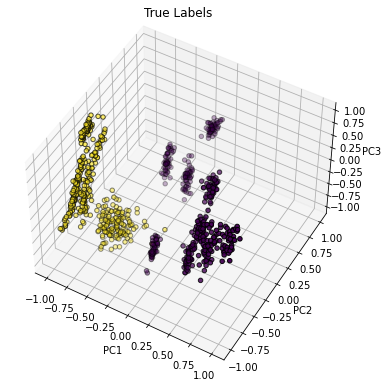

In [6]:
X_toplot = Xpca_scaled[:,range(0,3)]

fig = plt.figure(1, figsize=(5, 5))

ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48)
ax.scatter(X_toplot[:, 0], X_toplot[:, 1], X_toplot[:, 2], c=yh_km.astype(float), edgecolor="k")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Prediction")

fig = plt.figure(2, figsize=(5, 5))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48)
ax.scatter(X_toplot[:, 0], X_toplot[:, 1], X_toplot[:, 2], c=Y, edgecolor="k")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("True Labels")


fig.show()



<AxesSubplot:xlabel='TSNE dim 1', ylabel='TSNE dim 2'>

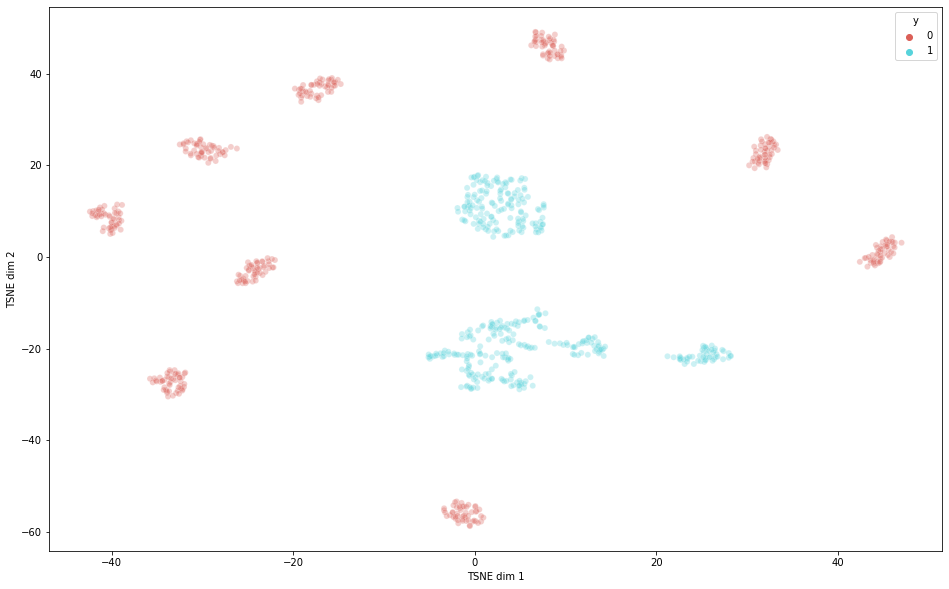

In [7]:
X_e = TSNE(n_components=2,init='random').fit_transform(Xpca_scaled)

df = pd.DataFrame({"TSNE dim 1":X_e[:,0],"TSNE dim 2":X_e[:,1],"y":Yc})

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="TSNE dim 1", y="TSNE dim 2",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full",
    alpha=0.3
)


# SVM One-class classification




In [11]:
clf = OneClassSVM(kernel='poly',degree=4,gamma='auto')
yh_svm = clf.fit_predict(Xpca_scaled)


C:\Users\rodri\AppData\Local\Temp/ipykernel_16268/4230963922.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48)
C:\Users\rodri\AppData\Local\Temp/ipykernel_16268/4230963922.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


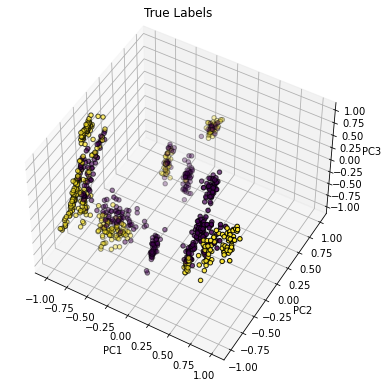

In [12]:
fig = plt.figure(2, figsize=(5, 5))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48)
ax.scatter(X_toplot[:, 0], X_toplot[:, 1], X_toplot[:, 2], c=yh_svm, edgecolor="k")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("True Labels")


fig.show()
